# Target - Treatment

# Import Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

# Load Data

In [3]:
data = pd.read_csv('diabetic_data.csv')

##### In the next step we filter out those instances where the medicines/treatments given are for Diabetes. This allows us to work with only those patients who actually have diabetes.

In [4]:
data_diabetic = data[data['diabetesMed']=='Yes']

In [5]:
# Create a copy of the final usable dataframe
df = data_diabetic.copy(deep=True)

# Display the first 5 instances
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [137]:
# Display the rows and columns in df
pd.DataFrame([[df.shape[0], df.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,78363,50


In [138]:
# List the columns to understand the data
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [139]:
# Understand the description of the data and the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78363 entries, 1 to 101764
Data columns (total 50 columns):
encounter_id                78363 non-null int64
patient_nbr                 78363 non-null int64
race                        78363 non-null object
gender                      78363 non-null object
age                         78363 non-null object
weight                      78363 non-null object
admission_type_id           78363 non-null int64
discharge_disposition_id    78363 non-null int64
admission_source_id         78363 non-null int64
time_in_hospital            78363 non-null int64
payer_code                  78363 non-null object
medical_specialty           78363 non-null object
num_lab_procedures          78363 non-null int64
num_procedures              78363 non-null int64
num_medications             78363 non-null int64
number_outpatient           78363 non-null int64
number_emergency            78363 non-null int64
number_inpatient            78363 non-null int64
di

# Modify the DataFrame
- As we can see through the EDA, the columns that we drop in the next cell, either had the maximum missing values or were, as per the problem statement, not relevant features for prediction purposes.

In [6]:
df = df.drop(columns=['patient_nbr', 'weight', 'medical_specialty', 'payer_code', 
                      'diag_1', 'diag_2', 'diag_3']).reset_index(drop=True)

In [7]:
# Check for missing values in the remaning columns
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 1871
gender 0
age 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


# Feature Engineering

## Race
### Replace and Impute Missing Values is column 'race'
- From the columns displayed above, we can see that the column 'race' has the most missing values. Since race is a relevant feature, we replace and impute missing values in column 'race'. Missing values in the data are expressed as '?', which are replaced by 'nan'.

In [8]:
# Unique values in column 'race'
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Hispanic', 'Asian'],
      dtype=object)

In [9]:
# Replace '?' with 'nan' using replace()
df['race'] = df['race'].replace('?', np.nan)

In [10]:
# Verify the unique values
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Hispanic', 'Asian'],
      dtype=object)

In [13]:
# Categorical Imputer is used to impute the missing values in column 'race' represented by 'nan'
!pip install sklearn-pandas
from sklearn_pandas import CategoricalImputer

ci = CategoricalImputer()

df['race'] = ci.fit_transform(df['race'])

In [14]:
# Verify the unique values again
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Hispanic', 'Asian'],
      dtype=object)

In [15]:
# Display the first 5 instances
df.head()

,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1,64410,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
2,500364,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3,16680,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,35754,Caucasian,Male,[50-60),2,1,2,3,31,6,...,No,Steady,No,No,No,No,No,No,Yes,>30


## Gender
### Remove Missing/Invalid Values from column 'gender'
- Column 'gender' has 3 distinct classes - 'Male', 'Female' and 'Unknown/Invalid'. Since we cannot impute such values as gender, we can remove those rows which have gender=='Unknown/Invalid'.

In [16]:
# List the unique values in cloumn 'gender'
df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [17]:
# Filter out the missiing/invalid values and save it as the new dataframe
df = df[df['gender']!='Unknown/Invalid']

In [150]:
# Display the fist 5 instances
df.head()

,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1,64410,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
2,500364,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3,16680,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,35754,Caucasian,Male,[50-60),2,1,2,3,31,6,...,No,Steady,No,No,No,No,No,No,Yes,>30


## Medications/Treatments
### Custom Encoding for Medications
The dataset contains 23 different drugs which have been given to diabetic patients in different combinations. These columns along with the column 'insulin' have 4 unique values - 'No','Steady','Up','Down'.

- We create a dataframe 'treatment' from the main dataframe with the columns 'encounter_id', 'insulin' and the 23 medications.
- The 4 unique values are replaced as binary:

  - No (0): That particular medication was not given as part of the treatment
  - Steady, Up, Down (1): That particulat medication was given as part of the treatment
  
- We set the index as 'encounter_id' so as to be able to join this dataframe to the original one

In [18]:
# Create dataframe and  encode the 4 unique values
treatment = df[['encounter_id','insulin','metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']].copy()

treatment = treatment.replace(['No','Steady','Up','Down'],[0,1,1,1])

# Set index
treatment.set_index('encounter_id', inplace =True)

# Display first 5 instances
treatment.head()

,insulin,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,...,miglitol,troglitazone,tolazamide,examide,citoglipton,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
encounter_id,,,,,,,,,,,,,,,,,,,,,
149190,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64410,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
500364,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16680,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
35754,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Sum total of the different combinations of medication given
treatment.sum(axis=1).value_counts()

1    47314
2    21871
3     7778
4     1335
5       58
6        5
dtype: int64

####  When insulin is given (insulin = 1), there are maximum of 6 combinations of medicines given.
  - 1 implies only insulin is given as treatment
  - 2-6 implies a combination of medication including insulin and the remaining 23, insulin+others (io), are given as treatment

In [20]:
# Sum total of the different combinations of medication given, when insulin is given
treatment[treatment['insulin']==1].sum(axis=1).value_counts()

1    30965
2    15437
3     6625
4     1295
5       57
6        4
dtype: int64

#### When insulin is given (insulin = 0), there are maximum of 6 combinations of medicines given.
  - 1 implies only one of the 23 medications are given as treatment
  - 2-6 implies a combination of the 23 medications are given as treatment

In [21]:
# Sum total of the different combinations of medication given, when insulin is not given
treatment[treatment['insulin']==0].sum(axis=1).value_counts()

1    16349
2     6434
3     1153
4       40
6        1
5        1
dtype: int64

#### The different combinations of the medications in both cases (insulin=1 and insulin=0) are replaced with 3 unique categories
  - insulin
  - io
  - other

In [22]:
# When insulin is given
insulin = treatment[treatment['insulin']==1].sum(axis=1).replace([1,2,3,4,5,6],['insulin','io','io','io','io','io'])

In [23]:
# When insulin is not given
no_insulin = treatment[treatment['insulin']==0].sum(axis=1).replace([1,2,3,4,5,6],['other','other','other','other','other','other'])

##### Concatenate the 2 columns - insulin and no_insulin and create a new column in 'treatment' dataframe called 'treatment'

In [24]:
treatment = pd.concat([insulin, no_insulin])
treatment = pd.DataFrame({'treatment':treatment})

In [158]:
# Display the frist 5 instances
treatment.head()

,treatment
encounter_id,
149190,insulin
500364,insulin
16680,io
35754,insulin
55842,io


In [25]:
# Add the new column 'treatment' to the original data frame using .join(), using 'encounter_id'
df = df.join(treatment, on = 'encounter_id')

# Display the frist 5 instances
df.head()

,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,treatment
0,149190,Caucasian,Female,[10-20),1,1,7,3,59,0,...,Up,No,No,No,No,No,Ch,Yes,>30,insulin
1,64410,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,Yes,NO,other
2,500364,Caucasian,Male,[30-40),1,1,7,2,44,1,...,Up,No,No,No,No,No,Ch,Yes,NO,insulin
3,16680,Caucasian,Male,[40-50),1,1,7,1,51,0,...,Steady,No,No,No,No,No,Ch,Yes,NO,io
4,35754,Caucasian,Male,[50-60),2,1,2,3,31,6,...,Steady,No,No,No,No,No,No,Yes,>30,insulin


In [26]:
# Drop the encoded columns from the original dataframe
df = df.drop(columns = ['encounter_id','insulin','metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']).reset_index(drop=True)

In [161]:
# Display the frist 5 instances
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,treatment
0,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,None,None,Ch,Yes,>30,insulin
1,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,None,None,No,Yes,NO,other
2,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,None,None,Ch,Yes,NO,insulin
3,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,None,None,Ch,Yes,NO,io
4,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,9,None,None,No,Yes,>30,insulin


#### The column 'treatment' has 3 classes - 'other', 'insulin' and 'io'. 'Other' implies that the patient has no insulin as part of their treatment. Hence, if we consider the kind of treatment that a diabetic patient receives, they either have only 'insulin' or 'insuin and other medications'. 
- Hence we filter out those rows that have insulin = other. The new dataframe contains only those rows that have the treatment column with 2 classes - 'insulin' and 'io'.

In [27]:
df = df[df['treatment']!='other']

df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,treatment
0,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,None,None,Ch,Yes,>30,insulin
2,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,None,None,Ch,Yes,NO,insulin
3,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,None,None,Ch,Yes,NO,io
4,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,9,None,None,No,Yes,>30,insulin
5,Caucasian,Male,[60-70),3,1,2,4,70,1,21,0,0,0,7,None,None,Ch,Yes,NO,io


In [28]:
df['treatment'].unique()

array(['insulin', 'io'], dtype=object)

insulin    30965
other      23978
io         23418
Name: treatment, dtype: int64

## Age
### Custom encoding of the categories in column 'age'
- The column 'age' has 10 different categories ranging from 0-70, as shown below.

In [29]:
df['age'].value_counts()

[70-80)     13131
[60-70)     12102
[50-60)      9476
[80-90)      8543
[40-50)      5559
[30-40)      2302
[90-100)     1342
[20-30)      1214
[10-20)       581
[0-10)        133
Name: age, dtype: int64

#### The following function provides the following label/custom categories for age:

- [0-10): 1
- [10-20): 2
- [20-30): 3
- [30-40): 4
- [40-50): 5
- [50-60): 6
- [60-70): 7
- [70-80): 8
- [80-90): 9
- [90-100): 10


In [30]:
# encoding age columns with 10 categories
labels = data['age'].astype('category').cat.categories.tolist()
replace_age = {'age' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

# Display the categories
replace_age

{'age': {'[0-10)': 1,
  '[10-20)': 2,
  '[20-30)': 3,
  '[30-40)': 4,
  '[40-50)': 5,
  '[50-60)': 6,
  '[60-70)': 7,
  '[70-80)': 8,
  '[80-90)': 9,
  '[90-100)': 10}}

In [31]:
# Replace each age category with a custom label
df = df.replace(replace_age)

# Display the first 5 instances
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,treatment
0,Caucasian,Female,2,1,1,7,3,59,0,18,0,0,0,9,None,None,Ch,Yes,>30,insulin
2,Caucasian,Male,4,1,1,7,2,44,1,16,0,0,0,7,None,None,Ch,Yes,NO,insulin
3,Caucasian,Male,5,1,1,7,1,51,0,8,0,0,0,5,None,None,Ch,Yes,NO,io
4,Caucasian,Male,6,2,1,2,3,31,6,16,0,0,0,9,None,None,No,Yes,>30,insulin
5,Caucasian,Male,7,3,1,2,4,70,1,21,0,0,0,7,None,None,Ch,Yes,NO,io


## Remaining Categorical Features
### For the target 'Readmission', we need to perform custom encoding of certain columns:

- Column 'readmitted' has 3 unique values - 'NO', '>30', '<30'. Our aim to predict if the patients get readmitted or not within 30 days. Hence, we encode, 
  - 'No' (patient does not get readmitted) as 0
  - '>30' (patient gets readmitted after 30 days) as 0
  - '<30' (patient gets readmitted within 30 days) as 1.


- Column 'change' has 2 unique values - 'No', 'Ch'. We encode,
    - 'No' (No change in medication) as 0
    - 'Ch' (Change in medication) as 1

- Column 'gender' has 2 unique values - 'Male', 'Female'. We encode,
     - 'Male' as 0
     - 'Female' as 1

- Column 'max_glu_serum' has 4 unique values - 'None', '>300', 'Norm', '>200'. We encode,
    - 'None' (No Glucose Serum test was taken) as -99
    - 'Norm' (Normal test results) as 0
    - '>300' and '>200' (Abnormal test results) as 1

- Column 'A1Cresult' has 4 unique values - 'None', '>7', 'Norm', '>8'. We encode,
    - 'None' (No Hemoglobin test was taken) as -99
    - 'Norm' (Normal test results) as 0
    - '>7' and '>8' (Abnormal test results) as 1

- Column 'treatment' has 2 unique values - 'insulin', 'io'. We encode,
     - 'insulin' (Only insulin is provided as treatment) as 1
     - 'io' (A combination of medications including insulin) as 2

In [32]:
# Encoding column 'readmitted'
df['readmitted'] = df['readmitted'].replace(['NO', '>30', '<30'], [0,0,1])

# Encoding column 'change'
df['change'] = df['change'].replace(['No', 'Ch'], [0,1])

# Encoding column 'gender'
df['gender'] = df['gender'].replace(['Male', 'Female'], [0,1])

# Encoding column 'max_glu_serum'
df['max_glu_serum'] = df['max_glu_serum'].replace(['None', '>300', 'Norm', '>200'], [-99,1,0,1])

# Encoding column 'A1Cresult'
df['A1Cresult'] = df['A1Cresult'].replace(['None', '>7', '>8', 'Norm'], [-99,1,1,0])

# Encoding column 'treatment'
df['treatment'] = df['treatment'].replace(['insulin', 'io'],[1, 0])

In [169]:
# Display the first 5 instances
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,treatment
0,Caucasian,1,2,1,1,7,3,59,0,18,0,0,0,9,-99,-99,1,Yes,0,1
2,Caucasian,0,4,1,1,7,2,44,1,16,0,0,0,7,-99,-99,1,Yes,0,1
3,Caucasian,0,5,1,1,7,1,51,0,8,0,0,0,5,-99,-99,1,Yes,0,0
4,Caucasian,0,6,2,1,2,3,31,6,16,0,0,0,9,-99,-99,0,Yes,0,1
5,Caucasian,0,7,3,1,2,4,70,1,21,0,0,0,7,-99,-99,1,Yes,0,0


#### We use the function 'cat_var_checker' to list the remaining categorical values we may need to encode

In [33]:
# find the categorical variables

def cat_var_checker(df):
    """
    The categorical variable checker

    Parameters
    ----------
    df: the dataframe
    
    Returns
    ----------
    The dataframe of categorical variables and their number of unique value
    """
    
    # Get the dataframe of categorical variables and their number of unique value
    df_cat = pd.DataFrame([[var, df[var].nunique(dropna=False)]
                           for var in df.columns if df[var].dtype == 'object'],
                          columns=['var', 'nunique'])
    
    # Sort df_cat in accending order of the number of unique value
    df_cat = df_cat.sort_values(by='nunique', ascending=False).reset_index(drop=True)
    
    return df_cat

In [34]:
# Call cat_var_checker on df
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique
0,race,5
1,diabetesMed,1


In [35]:
# One-hot-encode the remaining categorical features in df except treatment
df = pd.get_dummies(df, columns=['race', 'diabetesMed'])

# Display the first 5 instances
df.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,A1Cresult,change,readmitted,treatment,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,diabetesMed_Yes
0,1,2,1,1,7,3,59,0,18,0,...,-99,1,0,1,0,0,1,0,0,1
2,0,4,1,1,7,2,44,1,16,0,...,-99,1,0,1,0,0,1,0,0,1
3,0,5,1,1,7,1,51,0,8,0,...,-99,1,0,0,0,0,1,0,0,1
4,0,6,2,1,2,3,31,6,16,0,...,-99,0,0,1,0,0,1,0,0,1
5,0,7,3,1,2,4,70,1,21,0,...,-99,1,0,0,0,0,1,0,0,1


In [173]:
# Display the columns in the dataframe
df.columns

Index(['gender', 'age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'change', 'readmitted', 'treatment',
       'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'diabetesMed_Yes'],
      dtype='object')

In [36]:
# Check the shape of the dataframe
pd.DataFrame([[df.shape[0], df.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,54383,24


# Getting the Training, Testing and Validation sets

In [37]:
# Set target
target = 'treatment'

In [38]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and testing (20%)
df_train, df_test = train_test_split(df, train_size=0.8, random_state=42, stratify=df[target])

# Reset the index
df_train, df_test = df_train.reset_index(drop=True), df_test.reset_index(drop=True)

In [177]:
# Check the shape of the training set
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,43506,24


In [178]:
# Check the shape of the testing set
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,10877,24


In [39]:
# training and validation
df_train, df_valid = train_test_split(df_train, train_size=0.8, random_state=42, stratify=df_train[target])

# Reset the index
df_train, df_valid = df_train.reset_index(drop=True), df_valid.reset_index(drop=True)

In [40]:
# Check the shape of the training set
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,34804,24


In [41]:
# Check the shape of the validation set
pd.DataFrame([[df_valid.shape[0], df_valid.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,8702,24


In [182]:
# Display the first 5 instances of training set
df_train.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,A1Cresult,change,readmitted,treatment,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,diabetesMed_Yes
0,1,9,1,3,7,4,69,0,14,0,...,-99,1,0,0,0,0,1,0,0,1
1,1,7,1,1,7,10,53,1,19,0,...,1,1,0,1,1,0,0,0,0,1
2,1,7,1,1,7,10,86,6,42,0,...,-99,1,0,0,0,0,1,0,0,1
3,1,7,2,6,1,2,63,0,11,0,...,-99,1,0,0,1,0,0,0,0,1
4,0,8,1,3,7,2,26,1,11,0,...,-99,0,0,1,1,0,0,0,0,1


In [183]:
# Display the first 5 instances of testing set
df_test.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,A1Cresult,change,readmitted,treatment,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,diabetesMed_Yes
0,0,8,1,3,1,8,68,3,18,0,...,-99,1,0,0,0,0,1,0,0,1
1,0,9,1,1,7,11,47,0,10,0,...,-99,1,0,1,0,0,1,0,0,1
2,1,4,6,1,17,1,56,0,10,0,...,-99,1,0,0,0,0,1,0,0,1
3,1,9,1,1,7,4,58,3,12,0,...,-99,0,0,1,0,0,1,0,0,1
4,1,9,6,3,7,10,93,3,31,0,...,1,1,1,1,0,0,1,0,0,1


In [184]:
# Display the first 5 instances of validation set
df_valid.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,A1Cresult,change,readmitted,treatment,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,diabetesMed_Yes
0,0,10,1,3,7,10,83,0,31,0,...,-99,1,0,0,0,0,1,0,0,1
1,1,7,2,1,1,3,40,1,18,0,...,-99,0,1,1,0,0,1,0,0,1
2,1,6,2,1,1,3,37,0,10,2,...,-99,1,0,1,1,0,0,0,0,1
3,1,9,3,6,1,8,35,0,32,0,...,-99,1,0,1,1,0,0,0,0,1
4,1,6,5,1,1,3,9,3,15,1,...,-99,0,0,1,0,0,1,0,0,1


# Getting the Features

In [42]:
features = np.setdiff1d(df.columns, [target])

In [43]:
# Get the feature matrix
X_train = df_train[features].to_numpy()
X_valid = df_valid[features].to_numpy()
X_test = df_test[features].to_numpy()

# Get the target vector
y_train = df_train[target].astype(int).to_numpy()
y_valid = df_valid[target].astype(int).to_numpy()

# Scaling the Data

In [44]:
from sklearn.preprocessing import MinMaxScaler

# The MinMaxScaler
mms = MinMaxScaler()

# Normalize the training data
X_train = mms.fit_transform(X_train)

# Normalize the validation data
X_valid = mms.transform(X_valid)

# Normalize the testing data
X_test = mms.transform(X_test)

# Hyperparameter Tuning and Model Selection

In [45]:
# Import the models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

models = {'lr': LogisticRegression(class_weight='balanced', random_state=42),
          'dtc': DecisionTreeClassifier(class_weight='balanced', random_state=42),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=42),
          'hgbc': HistGradientBoostingClassifier(random_state=42),
          'xgbc': XGBClassifier(seed=42)}

In [46]:
# Create a pipeline to run the models
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [47]:
from sklearn.model_selection import PredefinedSplit

# Combine the feature matrix in the training and validation data
X_train_valid = np.vstack((X_train, X_valid))

# Combine the target vector in the training and validation data
y_train_valid = np.append(y_train, y_valid)

# Get the indices of training and validation data
train_valid_idxs = np.append(np.full(X_train.shape[0], -1), np.full(X_valid.shape[0], 0))

# The PredefinedSplit
ps = PredefinedSplit(train_valid_idxs)

In [48]:
# Create a dictionary for the paramenter grids
param_grids = {}

##### Linear Regression

In [49]:
# The grids for C
C_grids = [10 ** i for i in range(-2, 3)]

# The grids for tol
tol_grids = [10 ** i for i in range(-6, -1)]

# Update param_grids
param_grids['lr'] = [{'model__C': C_grids,
                      'model__tol': tol_grids}]

##### Decision Tree Classifier

In [50]:
# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['dtc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

##### Random Forest Classifier

In [51]:
# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

##### Histogram Gradient-Boost Classifier

In [52]:
# The grids for learning_rate
learning_rate_grids = [10 ** i for i in range(-3, 2)]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

##### XgBoost Classifier

In [53]:
# The grids for eta
eta_grids = [10 ** i for i in range(-4, 1)]

# The grids for gamma
gamma_grids = [0, 10, 100]

# The grids for lambda
lambda_grids = [10 ** i for i in range(-4, 5)]

# Update param_grids
param_grids['xgbc'] = [{'model__eta': eta_grids,
                        'model__gamma': gamma_grids,
                        'model__lambda': lambda_grids}]

## Hyperparameter Tuning

In [54]:
import os

# Make directory
directory = os.path.dirname('./cv_results/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [56]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_param_estimator_gs = []

for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_micro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_valid, y_train_valid)
    
    # Update best_score_param_estimator_gs
    best_score_param_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf='./cv_results/' + acronym + '.csv', index=False)

## Model Selection

In [58]:
# Sort best_score_param_estimator_gs in descending order of the best_score_
best_score_param_estimator_gs = sorted(best_score_param_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_param_estimator_gs
pd.DataFrame(best_score_param_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.768329,"{'model__learning_rate': 0.1, 'model__min_samp...",(HistGradientBoostingClassifier(l2_regularizat...
1,0.764882,"{'model__eta': 0.0001, 'model__gamma': 0, 'mod...","(XGBClassifier(base_score=0.5, booster='gbtree..."
2,0.761434,"{'model__min_samples_leaf': 1, 'model__min_sam...","((DecisionTreeClassifier(class_weight=None, cr..."
3,0.756838,"{'model__min_samples_leaf': 100, 'model__min_s...",(DecisionTreeClassifier(class_weight='balanced...
4,0.749023,"{'model__C': 10, 'model__tol': 0.01}","(LogisticRegression(C=10, class_weight='balanc..."


In [200]:
# import os

# # Make directory
# directory = os.path.dirname('./figure/')
# if not os.path.exists(directory):
#     os.makedirs(directory)

In [202]:
# # Implement me
# # Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
# best_score_gs, best_param_gs, best_estimator_gs = best_score_param_estimator_gs[0]

# # Implement me
# # Get the dataframe of feature and importance
# df_fi = pd.DataFrame(np.hstack((features.reshape(-1, 1), best_estimator_gs.named_steps['model'].feature_importances_.reshape(-1, 1))),
#                          columns=['Features', 'Importance'])

# # Implement me
# # Sort df_fi in descending order of the importance
# df_fi = df_fi.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# # Print df_fi_rfc
# df_fi

In [203]:
# import matplotlib.pyplot as plt
# %matplotlib inline 

# # Set matplotlib sizes
# plt.rc('font', size=20)
# plt.rc('axes', titlesize=20)
# plt.rc('axes', labelsize=20)
# plt.rc('xtick', labelsize=20)
# plt.rc('ytick', labelsize=20)
# plt.rc('legend', fontsize=20)
# plt.rc('figure', titlesize=20)

# # Create a figure
# fig = plt.figure(figsize=(10, 5))

# # The bar plot of feature importance
# plt.bar(df_fi['Features'], df_fi['Importance'], color='green')

# # Set x-axis
# plt.xlabel('Features')
# plt.xticks(rotation=90)

# # Set y-axis
# plt.ylabel('Importance')

# # Save and show the figure
# plt.tight_layout()
# plt.savefig('./figure/feature_importance.pdf')
# plt.show()

## Deep Neural Network

### Create the directory of the saved models

In [57]:
import os

# Make directory
directory = os.path.dirname('./models/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Designing the model

In [59]:
#%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

In [60]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

In [78]:
# Add layers
# A sequential dnn
model = keras.models.Sequential()

# Add the input layer
model.add(keras.layers.Flatten(input_shape = [X_train.shape[1]]))

# Add three hidden layers
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))

# Add the output layer
model.add(keras.layers.Dense(1, activation="sigmoid"))

# The model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 23)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                1200      
_________________________________________________________________
dense_10 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_11 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_12 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_13 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

### Compiling the model

In [79]:
# Compile the model
model.compile(optimizer=keras.optimizers.SGD(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Setting Callbacks

In [80]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(
    filepath="model/model_treatment.h5",
    save_best_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True)

### Training, evaluating, and saving the best model

In [81]:
# Train, evaluate and save the best model
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_valid, y_valid),batch_size=150,callbacks=[model_checkpoint_cb, early_stopping_cb])

Train on 34804 samples, validate on 8702 samples
Epoch 1/150
34804/34804 [==============================] - 2s 64us/sample - loss: 0.6836 - accuracy: 0.5643 - val_loss: 0.6752 - val_accuracy: 0.5694
Epoch 2/150
34804/34804 [==============================] - 1s 34us/sample - loss: 0.6657 - accuracy: 0.5704 - val_loss: 0.6536 - val_accuracy: 0.5939
Epoch 3/150
34804/34804 [==============================] - 1s 35us/sample - loss: 0.6320 - accuracy: 0.6607 - val_loss: 0.6052 - val_accuracy: 0.6887
Epoch 4/150
34804/34804 [==============================] - 1s 32us/sample - loss: 0.5718 - accuracy: 0.7151 - val_loss: 0.5402 - val_accuracy: 0.7268
Epoch 5/150
34804/34804 [==============================] - 1s 33us/sample - loss: 0.5164 - accuracy: 0.7284 - val_loss: 0.5053 - val_accuracy: 0.7023
Epoch 6/150
34804/34804 [==============================] - 1s 33us/sample - loss: 0.4862 - accuracy: 0.7318 - val_loss: 0.4771 - val_accuracy: 0.7349
Epoch 7/150
34804/34804 [==========================

### Plotting the learning curve

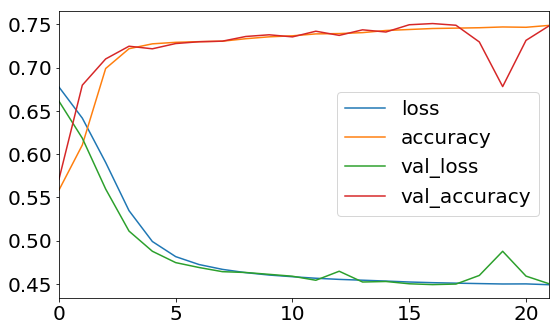

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Save and show the figure
plt.tight_layout()
plt.savefig('learning_curve_treatment.pdf')
plt.show()

### Testing

#### Load the saved best model

In [82]:
# Load the model
model = keras.models.load_model("model/model_treatment.h5")

#### Evaluating the model

In [83]:
# Evaluate the model on the test set
treament_loss, treatment_accuracy = model.evaluate(X_test, df_test[target].astype(int).to_numpy(), verbose=0)

# Print the accuracy
print('treatment_test_accuracy:', treatment_accuracy)

treatment_test_accuracy: 0.74818426


## Compare the models and select the best model

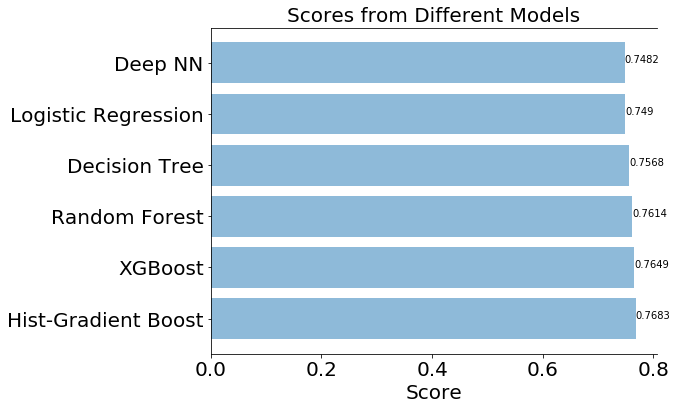

In [84]:
# Create 2 lists for x and y axis
models = ['Hist-Gradient Boost', 'XGBoost', 'Random Forest', 'Decision Tree', 'Logistic Regression', 'Deep NN']
scores = [round(best_score_param_estimator_gs[0][0],4), round(best_score_param_estimator_gs[1][0],4), 
          round(best_score_param_estimator_gs[2][0],4), round(best_score_param_estimator_gs[3][0],4), 
          round(best_score_param_estimator_gs[4][0],4), round(treatment_accuracy,4)]

# Plot the bar chart for models' scores
fig, ax = plt.subplots(figsize=(8, 6))
plt.barh(models, scores, align='center', alpha=0.5)
plt.xlabel('Score')
plt.title('Scores from Different Models')
#ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Show values on the bar chart
for index, value in enumerate(scores):
    plt.text(value, index, str(value))
plt.show()

Among the 6 models, Histogram-based Gradient Boost gives the best score, 0.7683 for the prediction of diabetic treatment.